# Random Variables and Distributions
DA Probability & Statistics Learning Series • Lesson 3(?)

<img src="https://ihaveapc.com/wp-content/uploads/2018/03/1-2.jpg" align="center" width="30%"/>

Welcome, again!

*See **#da_prob_stat** for discussion during and after this tutorial.*

# Goal:
![end_goal](./end_goal.png)

A **Random Variable** is a variable whose possible values are numerical outcomes of a random process
<img src="https://www.mathsisfun.com/data/images/random-variable-1.svg" align="center"/>

X really refers to the distribution of possible values and the associated probabilities.
This contrasts to your conventional algebraic variables that typically have a single value

![functions](./pebble_to_line.png)

A **discrete random variable** is one which may take on only a countable number of distinct values. For example, rolling a die.

$$
\begin{align}
X &= [{1},{2},{3},{4},{5},{6}]
\end{align}
$$

A discrete random variable must adhere to the following two rules:

$$
1: 0 < P(X=x_i) < 1 \text{ for each i }\\
2: P(X=x_1)+P(X=x_2)+...+P(X=x_k)=1
$$

A **continuous random variable** is one which takes an infinite number of possible values

$$
\begin{align}
Y &= \text{ exact transit time of a shipment }
\end{align}
$$

In [ ]:
# Import dependencies 
from custom.db_utils import get_connection
import pandas as pd

#Stats
import scipy.stats
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Get the database connection and cursor objects
conn, cur = get_connection()

# Use a context manager to open and close connection and files
with conn:
    
    # Open the query.sql file
    with open('invoicing_otp.sql', 'r') as q:

        # Save contents of query.sql as string
        query_str = q.read()
    
    # Use the read_sql method to get the data from Snowflake into a 
    # Pandas dataframe
    df = pd.read_sql(query_str, conn)
    
    # Make all the columns lowercase
    df.columns = map(str.lower, df.columns)

# Preview the data
df.sample(3)

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...


,invoice_id,invoice_shared_at,share_due_at,is_invoiced_on_time,days_to_share
33498,760717,2020-06-01 06:41:38.696009,2020-05-16 17:55:00+00:00,False,15.5324
7463,833231,2020-06-23 15:10:51.160421,2020-06-20 15:30:00+00:00,False,2.9867
22641,796762,2020-07-15 23:57:23.945661,2020-07-17 14:00:00+00:00,True,-1.5852


**TODO**: 

Based on the dataframe, define 2 random variables: one discrete and one continuous

**Discrete Random Variable**
$$
X=\left\{\begin{matrix}
1\text{ on-time}\\
0\text{ late}\;\;\;\;\;
\end{matrix}\right.
$$

**Continuous Random Variable**
$$
Y=\text{time to share}
$$

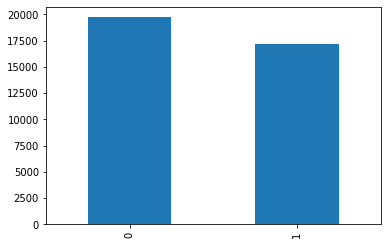

In [131]:
#Now lets plot the distributions of the discrete random variable
df['is_invoiced_on_time'].astype(int).value_counts().plot(kind="bar")

**Probability Distributions** are the summary of probabilities for the values of a random variable
<img src="https://miro.medium.com/max/700/1*nOMS0KgevT7YfqtfnhgXUg.png" align="center"/>

## Moments of the Distribution
<ol start="0">
  <li>Total Probability</li>
  <li>Expected Value: average or mean value of a random variable X, E[X]</li>
  <li>Variance: spread of the values of a random variable from the mean, Var(X)</li>
  <li>Skewness: measure of the asymmetry of the probability distribution of a random variable about its mean</li>
  <li>Kurtosis: measure of the "tailedness" of the probability distribution of a random variable</li>
</ol>

## Discrete Probability Distributions

Probability Mass Function (PMF): calculates the probability of observing a given value

Cumulative Density Function (CDF): calculates the probability of an observation equal or less than a value

0    19722
1    17221
Name: is_invoiced_on_time, dtype: int64


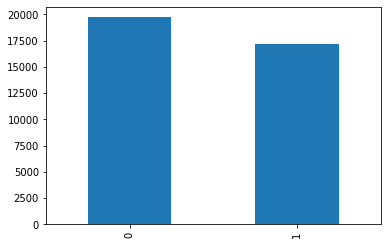

In [172]:
#Remind us what our histogram of our discrete random variable looked like
print(df['is_invoiced_on_time'].astype(int).value_counts())
df['is_invoiced_on_time'].astype(int).value_counts().plot(kind="bar")

Recall our **Discrete Random Variable**
$$
X=\left\{\begin{matrix}
1\text{ on-time}\\
0\text{ late}\;\;\;\;\;
\end{matrix}\right.
$$
         
This **Bernoulli Trial** has two possible outcomes, a success and failure.

An important part of every Bernoulli trial is that each action must be independent.

**TO DO:** Try to define Probability Mass Function for a bernoulli trial

<img src="https://www.statisticshowto.com/wp-content/uploads/2016/07/pdf-bernoulli.png" align="center"/>

A bernoulli distribution represents the success or failure of a single Bernoulli trial

**TO DO:** What is the expected value of our random variable?

$$
E[X]= p
$$

So a bernoulli distribution represents the success or failure of a single Bernoulli trial, what happens if we have _n_ trials?

{2: 38, 1: 32, 0: 14, 3: 16}


(array([14., 32., 38., 16.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

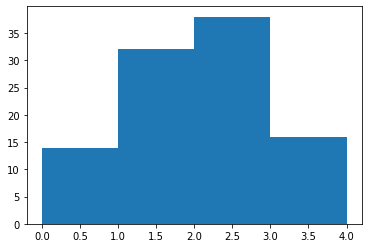

In [170]:
on_time_ct = [] 
for i in range(1,101):
    sample_data = df.sample(n = 3) 
    successes = sample_data['is_invoiced_on_time'].sum()
    on_time_ct.append(successes)
d = {x:on_time_ct.count(x) for x in on_time_ct}
print(d)

plt.hist(on_time_ct, bins=[0, 1, 2, 3,4])

How do we derive this mathematically?

**Possible Results**
$$
S=[TTT,TTF,TFF,TFT,FFF,FFT,FTF,FTT]
$$
Let X be the number of Trues selected (i.e. on time)

Possible values values of X are, therefore, either 0, 1, 2, or 3

Since we have the data, we know that that 48% of the invoices issued are on time, while 52% are not. 

That is, P(T)=.48 and P(F)=.52 Then, by independence:
$$
P(X=0) = P(FFF) = .52*.52*.52 = 1 * (.48)^0 * (.52)^3
$$
And, by independence and mutual exclusivity of TFF, FTF, and FFT:
$$
P(X=1) = P(TFF)+P(FTF)+P(FFT) = 3 * .48 * .52 * .52 = 3 * (.48)^1 * (.52)^2
$$
Do you see a pattern in our calculations?

Shipment Insurance Claims Rate
Let's say we had an insurance DA, Jason Exotic 🐅, who is tasked with estimating the true claims rate for shipments. He has a sample of 30,000 shipments that were insured and observes that claims were only filed for only 30 shipments.

Question: What's the likelihood we would've obtained this result if the true claims rate was actually .005? .001? .25?

## Binomial Distribution:
the number of success in a sequence of independent experiments

1. The number of observations n is fixed.
2. Each observation is independent.
3. Each observation represents one of two outcomes ("success" or "failure").
4. The probability of "success" p is the same for each outcome.

We denote the binomial distribution as 
$$
X\sim b(n, p)
$$

**PMF:** 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/20edfc22372742d64909cf7c7f97593bade88338" align="center"/>

**CDF:** 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8689ba703ee51a5f66f605ea1f293fc74fa380b9" align="center"/>


For a single trial, i.e., n = 1, the binomial distribution is a **Bernoulli distribution**

In [ ]:
I only anticipate getting this far!

## Poisson distribution:
 - The Poisson distribution can be used to calculate the probabilities of various numbers of "successes" based on the mean number of successes

**PDF:**
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/75b15a85051528f8722d2b676a557f6c22bf85c4" align="left "/>
**CDF:**
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/016f49082c09ba307c9cb2a51039134a4c35cca2" align="right "/>


Also see: 
 - Multinoulli and multinomial distributions (ex. probabilities of transportation mode)
 - Discrete uniform distribution

## Continuous Probability Distributions

**Probability Density Function (PDF):** calculates the probability of observing a given value

**Cumulative Density Function (CDF):** calculates the probability of an observation equal or less than a value

The **CDF** is the integral of the **PDF** from  −∞ to 𝑥

(array([6.7100e+02, 4.0020e+03, 2.4875e+04, 3.3940e+03, 6.2800e+02,
        1.9000e+02, 8.0000e+01, 4.0000e+01, 4.2000e+01, 2.8000e+01,
        1.5000e+01, 6.0000e+00, 8.0000e+00, 9.0000e+00, 1.0000e+01,
        1.1000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-55.307   , -30.878565,  -6.45013 ,  17.978305,  42.40674 ,
         66.835175,  91.26361 , 115.692045, 140.12048 , 164.548915,
        188.97735 , 213.405785, 237.83422 , 262.262655, 286.69109 ,
        311.119525, 335.54796 , 359.976395, 384.40483 , 408.833265,
        433.2617  ]),
 <a list of 20 Patch objects>)

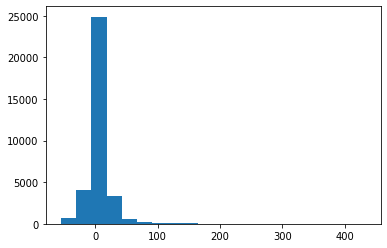

In [128]:
#Histogram of our continuous random variable
share_times = df['days_to_share'].tolist()
plt.hist(share_times, bins=20)

A **Gaussian (normal)** distribution: 
 - widely used in data science
 - represents many phenomena in the world
 - and the sum of small random variables also turns out to usually follow a normal distribution (Central Limit Theorem)

**PDF:**
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40" align="left "/>
**CDF:**
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/187f33664b79492eedf4406c66d67f9fe5f524ea" align="right "/>


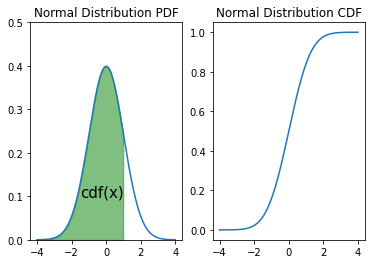

In [121]:
#Let's take a step back and visualize the relationship between the PDF and CDF

fig, (ax1, ax2) = plt.subplots(1,2)
x= np.arange(-4,4,0.001)
ax1.plot(x, norm.pdf(x))
px=np.arange(-4,1,0.01)
ax1.set_ylim(0,0.5)
ax1.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
ax1.set_title('Normal Distribution PDF')
# for text
ax1.text(-1.5,0.1,"cdf(x)", fontsize=15)
ax2.plot(x, norm.cdf(x))
ax2.set_title('Normal Distribution CDF')
plt.show()

Text(0.5, 1.0, 'Normal Distribution CDF')

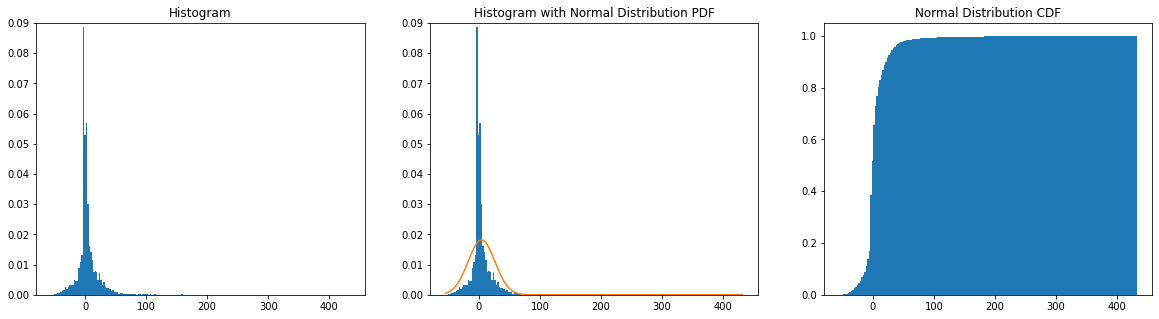

In [122]:
#now lets try to see how well our invoicing OTP data fits a normal distribution 
mean = np.mean(share_times)
std = np.std(share_times)

distribution = norm(mean, std)

min_time = min(share_times)
max_time = max(share_times)
values = list(range(int(min_time), int(max_time)))
probabilities = [distribution.pdf(v) for v in values]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.hist(share_times, bins=200, density=True)
ax1.set_title('Histogram')
ax1.set_ylim(0,0.09)

ax2.hist(share_times, bins=200, density=True)
ax2.plot(values, probabilities)
ax2.set_title('Histogram with Normal Distribution PDF')
ax2.set_ylim(0,0.09)

ax3.hist(share_times, cumulative=True, density=1, bins=200)
ax3.set_title('Normal Distribution CDF')

In [126]:
from scipy.stats import kurtosis, skew
print("mean : ", np.mean(share_times))
print("var  : ", np.var(share_times))
print("skew : ", skew(share_times))
print("kurt : ", kurtosis(share_times))

mean :  4.22293175471088
var  :  481.8870587581991
skew :  5.797138581317177
kurt :  67.47695923895657


**Homework:**
Take the same data in `invoice_details.sql` and find the distribution that best fits the following, and provide the 4 moments of the :

1. The probability that an invoice is shared by each of Flexport's entities
2. The probability that an invoice is shared in a given base currency
3. The probability that and invoice revenue amount (USD) is between 1000 and 2000. 